### In this notebook we will make a pytorch model and change it to MDF format and see the output using netron

PyTorch is an open-source machine learning library developed by Facebook's AI research team. It is widely used for building and training deep neural networks. PyTorch provides an efficient and flexible way to build complex models for a wide range of applications.

In PyTorch, a model is typically defined as a subclass of the torch.nn.Module class. This class provides a set of methods and tools for defining, training, and evaluating neural networks.

To create a PyTorch model, you define the layers of the network in the constructor of the subclass. Each layer can be a linear transformation, a convolution, or another type of operation. You can also define activation functions and other non-linearities as needed. Once the model is defined, you can use it to make predictions on input data.

During training, PyTorch models use automatic differentiation to compute gradients of the loss function with respect to the model parameters. This allows you to use gradient-based optimization algorithms like stochastic gradient descent to update the model parameters and improve its performance.

Overall, PyTorch provides a powerful and flexible framework for building and training deep learning models for a wide range of applications.

create a PyTorch model for the **Titanic: Machine Learning from Disaster** dataset on Kaggle, which is a classic binary classification problem of predicting survival on the Titanic based on various features of the passengers.

First, download the dataset from Kaggle and preprocess it. Here's an example of how to load the dataset and preprocess it:

In [1]:
import pandas as pd
import numpy
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Preprocess the dataset
def preprocess(df):
    # Drop unnecessary columns
    df = df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

    # Encode categorical features
    encoder = LabelEncoder()
    df["Sex"] = encoder.fit_transform(df["Sex"])
    df["Embarked"] = encoder.fit_transform(df["Embarked"].fillna("Unknown"))

    # Impute missing values
    df["Age"] = df["Age"].fillna(df["Age"].median())
    df["Fare"] = df["Fare"].fillna(df["Fare"].median())

    # Scale numerical features
    scaler = StandardScaler()
    df[["Age", "Fare"]] = scaler.fit_transform(df[["Age", "Fare"]])

    return df

train_df = preprocess(train_df)
test_df = preprocess(test_df)


Now preprocessed dataset, split it into training and validation sets:

In [2]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_df.drop("Survived", axis=1), train_df["Survived"], test_size=0.2, random_state=42)


**PyTorch Model implementation**


In [3]:
import torch
import torch.nn as nn

# the model has three fully connected layers with ReLU activation functions and a final sigmoid activation function, which outputs a probability between 0 and 1. The dropout layer is added to prevent overfitting.

class TitanicModel(nn.Module):
    def __init__(self):
        super(TitanicModel, self).__init__()
        self.fc1 = nn.Linear(7, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc3(x))
        return x


In [4]:
# Define the model, loss function, and optimizer
model = TitanicModel()
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
X_val = torch.tensor(X_val.to_numpy(), dtype=torch.float32)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float32).reshape(-1, 1)
y_val = torch.tensor(y_val.to_numpy(), dtype=torch.float32).reshape(-1, 1)

# Train the model
epochs = 100
batch_size = 32

for epoch in range(epochs):
    for i in range(0, len(X_train), batch_size):
        batch_X = X_train[i:i+batch_size]
        batch_y = y_train[i:i+batch_size]

        optimizer.zero_grad()

        output = model(batch_X)
        loss = criterion(output, batch_y)

        loss.backward()
        optimizer.step()

    # Evaluate the model on the validation set
    with torch.no_grad():
        val_output = model(X_val)
        val_loss = criterion(val_output, y_val)
        val_preds = torch.round(val_output)
        val_acc = (val_preds == y_val).sum().item() / len(y_val)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Val Acc: {val_acc:.4f}")


Epoch 1/100, Loss: 0.5150, Val Loss: 0.6196, Val Acc: 0.6480
Epoch 2/100, Loss: 0.4710, Val Loss: 0.5503, Val Acc: 0.7207
Epoch 3/100, Loss: 0.5366, Val Loss: 0.5145, Val Acc: 0.7598
Epoch 4/100, Loss: 0.4430, Val Loss: 0.5049, Val Acc: 0.7821
Epoch 5/100, Loss: 0.3688, Val Loss: 0.5349, Val Acc: 0.7765
Epoch 6/100, Loss: 0.2925, Val Loss: 0.5018, Val Acc: 0.7989
Epoch 7/100, Loss: 0.2532, Val Loss: 0.4825, Val Acc: 0.7765
Epoch 8/100, Loss: 0.2262, Val Loss: 0.4848, Val Acc: 0.7877
Epoch 9/100, Loss: 0.2932, Val Loss: 0.5041, Val Acc: 0.7989
Epoch 10/100, Loss: 0.3951, Val Loss: 0.4898, Val Acc: 0.7821
Epoch 11/100, Loss: 0.3202, Val Loss: 0.4490, Val Acc: 0.8045
Epoch 12/100, Loss: 0.2855, Val Loss: 0.4556, Val Acc: 0.8156
Epoch 13/100, Loss: 0.2689, Val Loss: 0.4654, Val Acc: 0.7989
Epoch 14/100, Loss: 0.3039, Val Loss: 0.4896, Val Acc: 0.7989
Epoch 15/100, Loss: 0.1933, Val Loss: 0.4687, Val Acc: 0.8212
Epoch 16/100, Loss: 0.1858, Val Loss: 0.4716, Val Acc: 0.7821
Epoch 17/100, Los

**EvaluableGraph**: This is a class that represents a computational graph in the Model Description Format (MDF) and provides methods to evaluate the graph given input values for its variables.

**pytorch_to_mdf**: This is a function that takes a PyTorch model and converts it to an MDF graph. The resulting MDF graph can then be used with the EvaluableGraph class to evaluate the model's outputs given input values.

Together, these modules provide a way to convert a PyTorch model to an MDF graph and evaluate its outputs using the EvaluableGraph class.

In [6]:
from modelspec.utils import _val_info
print(_val_info(val_preds))

tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
      

In [7]:
from modeci_mdf.execution_engine import EvaluableGraph
from modeci_mdf.interfaces.pytorch import pytorch_to_mdf

**pytorch_to_mdf()** function with the following arguments:

**model**: a PyTorch model object that will be converted to an MDF model object
**args**=X_train: a set of input arguments (presumably a training dataset) used to trace the PyTorch model's computation graph
**trace**=True: a flag indicating that the PyTorch model's computation graph should be traced to generate the MDF model's computational graph
The **pytorch_to_mdf()** function appears to be a utility function that converts a PyTorch model object to an MDF (Model Description Format) model object, which can be used with the Model Development Framework (MDF) library. This library is used for developing and deploying machine learning models on a variety of hardware platforms.

The function returns two objects:

mdf_model: an MDF model object that represents the converted PyTorch model
params_dict: a dictionary containing the parameters (weights and biases) of the converted PyTorch model, which can be used to initialize the MDF model's parameters

In [8]:
mdf_model, params_dict = pytorch_to_mdf(
        model=model,
        args=(X_val),
        trace=True,
    )

C:\Users\Rishikesh Maurya\MDF_3.9\.vir3.9.13\lib\site-packages\torch\onnx\symbolic_opset12.py:43: UserWarning: Dropout is a training op and should not be exported in inference mode. For inference, make sure to call eval() on the model and to export it with param training=False.
  warnings.warn("Dropout is a training op and should not be exported in inference mode. "


Export the MDF model in json format

In [9]:
mdf_model.to_json_file("Machine Learning workflows using MDF_Pytorch_to_MDF.json")

'Machine Learning workflows using MDF_Pytorch_to_MDF.json'

In [10]:
# This code performs the following steps:

# Accesses the first graph (mdf_graph) in a list of graphs stored in the mdf_model object.
# Sets the value of the "input1" key in a dictionary called params_dict to a NumPy array representation of the training input data (X_train).
# Creates an instance of the EvaluableGraph class, passing in the mdf_graph and a flag to suppress verbose output during evaluation.
# Evaluates the graph using the initializer dictionary (params_dict) as input.
# Obtains the output from the first output node of the graph using the get_output() method of the output_enodes list.
# Computes the index of the maximum value in the output using the numpy.argmax() function, which represents the predicted class label for the input data.
# In summary, this code is likely part of a machine learning pipeline where the mdf_model is a trained model, and the code is used to predict the class labels for the input data (X_train) using the mdf_graph.


mdf_graph = mdf_model.graphs[0]
# mdf_graph_nodes = mdf_graph.nodes[id='Conv_499']
params_dict["input1"] = X_val

eg = EvaluableGraph(graph=mdf_graph, verbose=False)

eg.evaluate(initializer=params_dict)

output_mdf = eg.output_enodes[0].get_output()

op_label_mdf = numpy.round(output_mdf)


Init graph: TitanicModelGraph
Evaluating graph: TitanicModelGraph, root nodes: ['Gemm_7'], with array format numpy


### Camparison of MDF and Pytorch Outputs

In [28]:
print(op_label_mdf==val_preds.numpy())

[[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 

Converting MDF graph: TitanicModelGraph to graphviz (level: 1, format: png)
    Node: Gemm_7
    Node: Relu_8
    Node: Dropout_11_12
    Node: Gemm_13
    Node: Relu_14
    Node: Dropout_17_18
    Node: Gemm_19
    Node: Sigmoid_20
    Edge: Gemm_7_Relu_8 connects Gemm_7 to Relu_8
    Edge: Relu_8_Dropout_11_12 connects Relu_8 to Dropout_11_12
    Edge: Dropout_11_12_Gemm_13 connects Dropout_11_12 to Gemm_13
    Edge: Gemm_13_Relu_14 connects Gemm_13 to Relu_14
    Edge: Relu_14_Dropout_17_18 connects Relu_14 to Dropout_17_18
    Edge: Dropout_17_18_Gemm_19 connects Dropout_17_18 to Gemm_19
    Edge: Gemm_19_Sigmoid_20 connects Gemm_19 to Sigmoid_20
Written graph image to: Machine Learning workflows using MDF_Pytorch_to_MDF.png


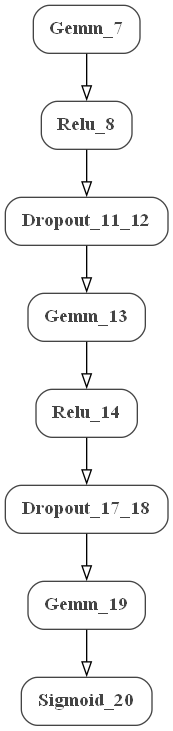

In [14]:
# This code generates a visual representation of the computational graph of the MDF model, using the to_graph_image() method of the mdf_model object. The generated image is saved as a PNG file with the given filename_root, and if view_on_render is True, the image is displayed using the default image viewer. The parameters engine, output_format, only_warn_on_fail, and is_horizontal control various aspects of the image generation, such as the layout engine to use, the output format, whether to show only warnings on failure, and the orientation of the graph.

# The second part of the code uses the Image function from the IPython.display module to display the generated image in the Jupyter notebook, assuming that the file has been saved to the current directory.

mdf_model.to_graph_image(
    engine="dot",
    output_format="png",
    view_on_render=False,
    level=1,
    filename_root="Machine Learning workflows using MDF_Pytorch_to_MDF",
    only_warn_on_fail=True,
    is_horizontal = False
)
from IPython.display import Image
Image(filename="Machine Learning workflows using MDF_Pytorch_to_MDF.png")

Check the out using Netron

In [15]:
# This code tries to display an image of an ONNX graph in the Jupyter notebook using the IPython.display module. The image file is loaded using the Image function and is displayed using the display function.

# If the image file does not exist, the code uses the torch.onnx.export method to convert the PyTorch model to an ONNX model and saves it as "Machine Learning workflows using MDF_Pytorch_to_MDF.onnx" file. The netron.start method is then called to open a web-based visualization tool called Netron that allows users to visualize and explore the ONNX model.

try:
    from IPython.display import Image
    onnx_graph = Image(filename="Machine Learning workflows using MDF_Pytorch_to_MDF.onnx.png")
    display(onnx_graph)
    
except:
    import netron
    torch.onnx.export(
            model,
            X_train,
            "Machine Learning workflows using MDF_Pytorch_to_MDF.onnx",
            verbose=True,
            input_names=[],
            opset_version=9,
        )
    netron.start("Machine Learning workflows using MDF_Pytorch_to_MDF.onnx")

graph(%0 : Float(712, 7, strides=[1, 712], requires_grad=0, device=cpu),
      %fc1.weight : Float(16, 7, strides=[7, 1], requires_grad=1, device=cpu),
      %fc1.bias : Float(16, strides=[1], requires_grad=1, device=cpu),
      %fc2.weight : Float(8, 16, strides=[16, 1], requires_grad=1, device=cpu),
      %fc2.bias : Float(8, strides=[1], requires_grad=1, device=cpu),
      %fc3.weight : Float(1, 8, strides=[8, 1], requires_grad=1, device=cpu),
      %fc3.bias : Float(1, strides=[1], requires_grad=1, device=cpu)):
  %7 : Float(712, 16, strides=[16, 1], requires_grad=1, device=cpu) = onnx::Gemm[alpha=1., beta=1., transB=1](%0, %fc1.weight, %fc1.bias) # C:\Users\Rishikesh Maurya\MDF_3.9\.vir3.9.13\lib\site-packages\torch\nn\modules\linear.py:103:0
  %input : Float(712, 16, strides=[16, 1], requires_grad=1, device=cpu) = onnx::Relu(%7) # C:\Users\Rishikesh Maurya\AppData\Local\Temp\ipykernel_1488\1736491696.py:15:0
  %9 : Float(712, 8, strides=[8, 1], requires_grad=1, device=cpu) = onnx

tensor([[1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
      